In [5]:
#EDA Outlier

import numpy as np 
import pandas as pd 
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns 

salesdata = pd.read_csv('https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/raw_sales.csv?raw=True')
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [6]:
#Find the outlier using the 3 sigma standard deviation method
# Function to derive the std dev (δ) , mean and cutoff value to detect the outliers
def find_anomalies(data) :
    anomalies = [] # creae an empty list 

    random_std_dev = stats.stdev(data)
    random_std_mean = stats.mean(data) #derive the std dev and mean 

    anamoly_cutoff = random_std_dev * 3 # derive the cut off value +/- 3 δ

    lower_limit = random_std_mean - anamoly_cutoff # derive the lower limit
    upper_limit = random_std_mean + anamoly_cutoff # derive the upper limit

    for outlier in data :
        if outlier > upper_limit or outlier < lower_limit :
            anomalies.append(outlier)

    return anomalies


In [ ]:
# Pass the column value for which the outlier has to be detected
anomalies_lst  = find_anomalies(salesdata['price'])
len(anomalies_lst)

# 461 / 29580 * 100 = 1.56 % of the data are outliers. 

461

In [10]:
#skew - fin the distibution of data using skewness

salesdata['price'].skew()


4.312009366902366

<Axes: xlabel='price', ylabel='Density'>

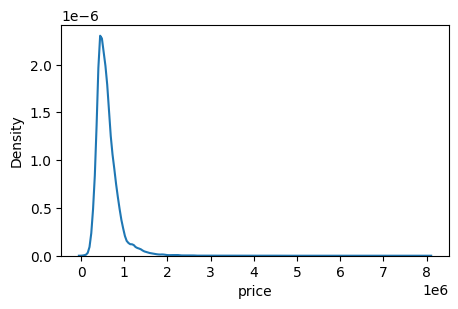

In [ ]:
#plot the distribution of the data using kde plot
plt.figure(figsize=(5,3))
sns.kdeplot(salesdata['price'])

In [ ]:
# use the log transformation to reduce the skewness of the data
salesdata['price_transformed'] = np.log(salesdata['price'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datesold           29580 non-null  object 
 1   postcode           29580 non-null  int64  
 2   price              29580 non-null  int64  
 3   propertyType       29580 non-null  object 
 4   bedrooms           29580 non-null  int64  
 5   price_transformed  29580 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
# perform the skewness test again
print(salesdata['price_transformed'].skew())
print(len(salesdata['price_transformed']))
#skewness is reduced from 4.47 to 0.87 after log transformation


0.4731646269984763
29580


In [ ]:
#do in iteration to find the outliers in the transformed data
anomolies_lst1 = find_anomalies(salesdata['price_transformed'])
len(anomolies_lst1)
#266 /29580 *100 = 0.89% 

266

<Axes: xlabel='price_transformed', ylabel='Density'>

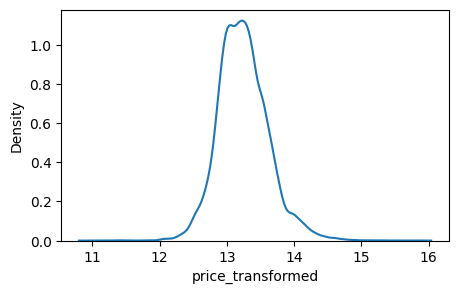

In [ ]:
plt.figure(figsize=(5,3))
sns.kdeplot(salesdata['price_transformed'])
# similairly reduce till the anamolies record count is less tha 0.3% of the total record count

In [24]:
salesdata['price_transformed1'] = np.log(salesdata['price_transformed'])
salesdata['price_transformed1'].skew()
print(salesdata['price_transformed1'].skew())
print(len(salesdata['price_transformed1']))
anomolies_lst2 = find_anomalies(salesdata['price_transformed1'])
len(anomolies_lst2)

0.33092530655758573
29580


251

<Axes: xlabel='price_transformed1', ylabel='Density'>

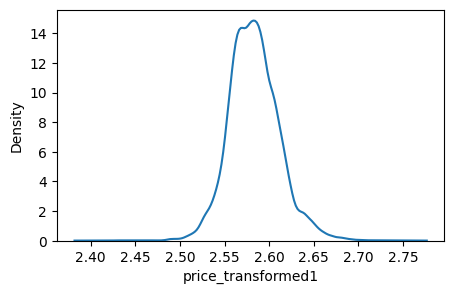

In [25]:
plt.figure(figsize=(5,3))
sns.kdeplot(salesdata['price_transformed1'])